Importation des librairies et des données :


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import time

In [2]:
# Decimal = ',' hyper important pour que python comprenne les nombres
data = pd.read_csv('/home/onyxia/Projet_statapp/data/EMP_deplacements_Charme.csv', delimiter=';', decimal=',', encoding = "ISO-8859-1")
display(data)


,IDENT_IND,IDENT_MEN,MVEH,POND_JOUR,MOTPREC,MMOTIFDES,MSTATION,Motif,Stationnement,Lieu_Depart,...,MVEHEXT,INSTANT_DEPART,INSTANT_ARRIVEE,DISTANCE,KVAQUIV,TRAVAILLE,Segment_detail,IDENT_V,Segment,num_dep_V
0,110000011400001,1100000114000,1,9891.108772,1.1,2.1,5,Se rendre dans une grande surface ou un centre...,Emplacement dans un parking public ou commerci...,Domicile,...,NaN,2029-01-03 14:15:00,2029-01-03 14:20:00,2.200000,1.0,2,Particulier,110000011400001_1_Particulier,Particulier,1
1,110000011400001,1100000114000,1,9891.108772,2.1,1.1,4,Retour au domicile,"Emplacement privé, gratuit (y compris domicile)",Parking,...,NaN,2029-01-03 14:45:00,2029-01-03 14:50:00,2.200000,1.0,2,Particulier,110000011400001_1_Particulier,Particulier,2
2,110000011500001,1100000115000,2,5275.295948,1.1,1.4,6,"Étudier (école, lycée, université)",Emplacement dans un parking public ou commerci...,Domicile,...,NaN,2029-01-05 07:45:00,2029-01-05 08:45:00,28.000000,1.0,2,Particulier,110000011500001_2_Particulier,Particulier,1
3,110000011500001,1100000115000,2,5275.295948,1.4,1.1,4,Retour au domicile,"Emplacement privé, gratuit (y compris domicile)",Parking,...,NaN,2029-01-05 10:30:00,2029-01-05 11:00:00,28.000000,1.0,2,Particulier,110000011500001_2_Particulier,Particulier,2
4,110000013500002,1100000135000,1,24058.724023,1.1,9.1,4,Travailler dans son lieu fixe et habituel,"Emplacement privé, gratuit (y compris domicile)",Domicile,...,NaN,2029-01-03 15:00:00,2029-01-03 15:15:00,5.321410,1.0,1,Particulier,110000013500002_1_Particulier,Particulier,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22521,940000044100001,9400000441000,1,15761.857518,3.1,2.1,5,Se rendre dans une grande surface ou un centre...,Emplacement dans un parking public ou commerci...,Rue,...,NaN,2029-01-03 10:30:00,2029-01-03 10:35:00,1.000000,1.0,2,Particulier,940000044100001_1_Particulier,Particulier,2
22522,940000044100001,9400000441000,1,15761.857518,2.1,4.1,3,"Démarche administrative, recherche d'informations","Stationnement sur la voie publique, payant",Parking,...,NaN,2029-01-03 11:30:00,2029-01-03 11:35:00,1.000000,1.0,2,Particulier,940000044100001_1_Particulier,Particulier,3
22523,940000044100001,9400000441000,1,15761.857518,4.1,1.1,1,Retour au domicile,"Stationnement sur la voie publique, gratuit sa...",Rue,...,NaN,2029-01-03 12:00:00,2029-01-03 13:00:00,36.476190,1.0,2,Particulier,940000044100001_1_Particulier,Particulier,4
22524,940000052100001,9400000521000,2,14068.334434,1.1,9.1,4,Travailler dans son lieu fixe et habituel,"Emplacement privé, gratuit (y compris domicile)",Rue,...,NaN,2029-01-03 06:00:00,2029-01-03 06:45:00,21.661727,1.0,1,Particulier,940000052100001_2_Particulier,Particulier,1


Sélection des variables "heure de premier départ" pour chaque individu :


In [3]:
premiers_departs = data.groupby('IDENT_MEN')['HEURE_DEPART'].min()

Un premier aperçu de ces données :

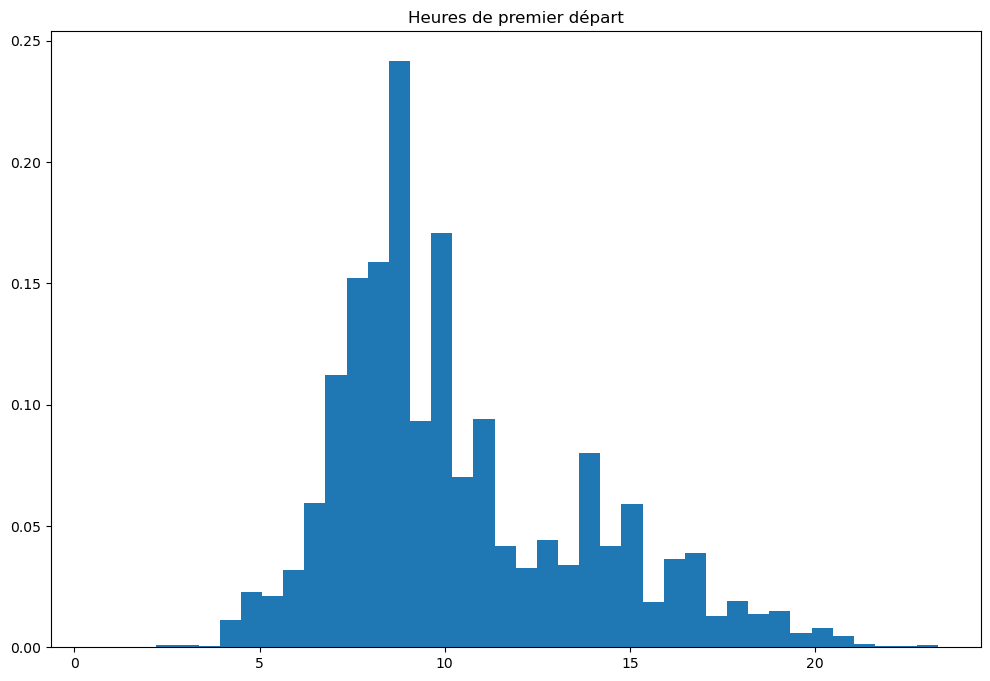

In [4]:
y, x = np.histogram(premiers_departs, bins=40, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0
plt.figure(figsize=(12,8))
plt.hist(premiers_departs, bins=40, density=True)
plt.title("Heures de premier départ")
plt.show()

Programme essayant de trouver la meilleure loi de modélisation :

/opt/mamba/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


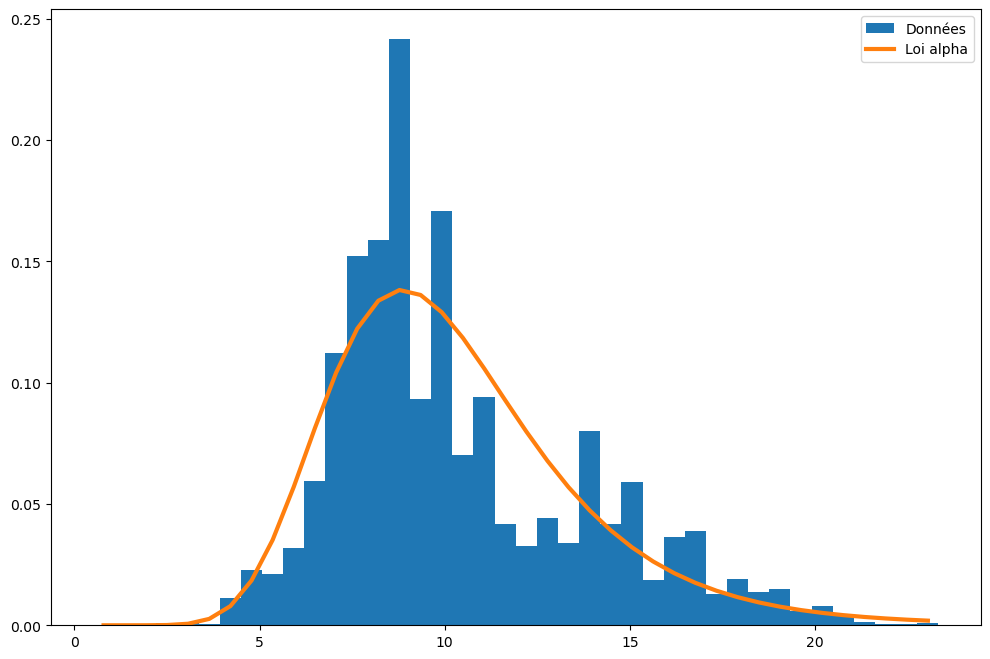

Selected Model :  alpha
Loc. param. :  -8.089564444860649
Scale param. :  104.99903407886063
Other arguments :  (5.869658573617832,)
SSE :  0.028327808740439588


In [5]:
dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']
sse = np.inf

# Pour chaque distribution
for name in dist_names:

  # Modéliser
  dist = getattr(scipy.stats, name)
  param = dist.fit(premiers_departs)

  # Paramètres
  loc = param[-2]
  scale = param[-1]
  arg = param[:-2]

  # PDF
  pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
  # SSE
  model_sse = np.sum((y - pdf)**2)

  # Si le SSE est diminué, enregistrer la loi
  if model_sse < sse :
    best_pdf = pdf
    sse = model_sse
    best_loc = loc
    best_scale = scale
    best_arg = arg
    best_name = name

plt.figure(figsize=(12,8))
plt.hist(premiers_departs, bins=40, density=True, label="Données")
plt.plot(x, best_pdf, label="Loi " + best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)

# Deuxième étape :
Modéliser deux lois pour être plus précis : l'une pour les premiers départ ayant lieu le matin, l'autre pour ceux de l'apres-midi.

In [6]:
prem_dep_matin = premiers_departs[premiers_departs < 12]
prem_dep_aprem = premiers_departs[premiers_departs >= 12]

# Le matin :

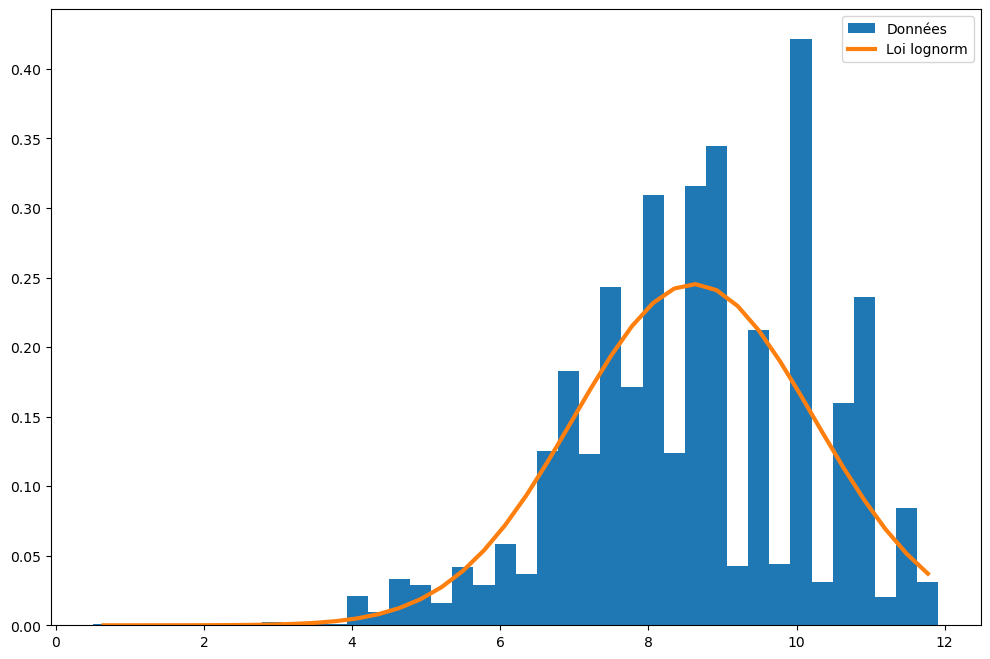

Selected Model :  lognorm
Loc. param. :  -262143.49999999988
Scale param. :  262152.11223338696
Other arguments :  (6.204792368989301e-06,)
SSE :  0.20977080169259038


In [7]:
y, x = np.histogram(prem_dep_matin, bins=40, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0
#plt.figure(figsize=(12,8))
#plt.hist(prem_dep_matin, bins=40, density=True)
#plt.title("Heures de premier départ")
#plt.show()

dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']
sse = np.inf

# Pour chaque distribution
for name in dist_names:

  # Modéliser
  dist = getattr(scipy.stats, name)
  param = dist.fit(prem_dep_matin)

  # Paramètres
  loc = param[-2]
  scale = param[-1]
  arg = param[:-2]

  # PDF
  pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
  # SSE
  model_sse = np.sum((y - pdf)**2)

  # Si le SSE est diminué, enregistrer la loi
  if model_sse < sse :
    best_pdf = pdf
    sse = model_sse
    best_loc = loc
    best_scale = scale
    best_arg = arg
    best_name = name

plt.figure(figsize=(12,8))
plt.hist(prem_dep_matin, bins=40, density=True, label="Données")
plt.plot(x, best_pdf, label="Loi " + best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)

# L'aprem :

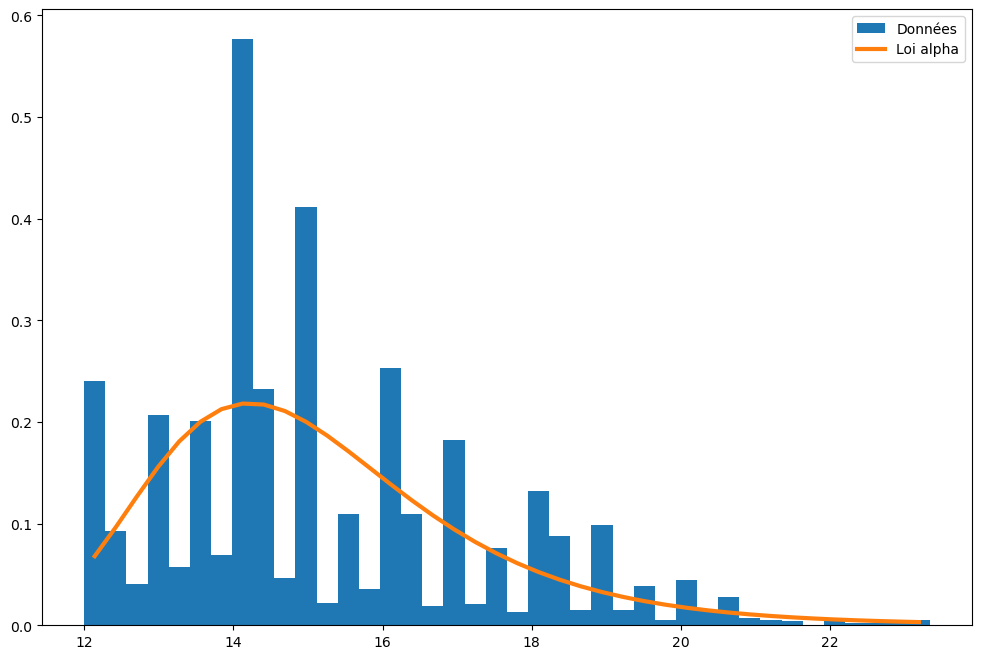

Selected Model :  alpha
Loc. param. :  3.6405927292794127
Scale param. :  64.65387998614574
Other arguments :  (5.7840182736786,)
SSE :  0.37114359318535406


In [8]:
y, x = np.histogram(prem_dep_aprem, bins=40, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0
#plt.figure(figsize=(12,8))
#plt.hist(prem_dep_aprem, bins=40, density=True)
#plt.title("Heures de premier départ")
#plt.show()

dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']
sse = np.inf

# Pour chaque distribution
for name in dist_names:

  # Modéliser
  dist = getattr(scipy.stats, name)
  param = dist.fit(prem_dep_aprem)

  # Paramètres
  loc = param[-2]
  scale = param[-1]
  arg = param[:-2]

  # PDF
  pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
  # SSE
  model_sse = np.sum((y - pdf)**2)

  # Si le SSE est diminué, enregistrer la loi
  if model_sse < sse :
    best_pdf = pdf
    sse = model_sse
    best_loc = loc
    best_scale = scale
    best_arg = arg
    best_name = name

plt.figure(figsize=(12,8))
plt.hist(prem_dep_aprem, bins=40, density=True, label="Données")
plt.plot(x, best_pdf, label="Loi " + best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)

**Note : 73,3% des premiers départs ont lieu le matin.**